# Scrapbook

This notebook is used for development, its content can change at any time.

In [1]:
import timeatlas as ta
import pandas as pd
from matplotlib import pyplot as plt
from darts import TimeSeries as DTS
import numpy as np

In [2]:
s = pd.read_csv("../data/bbdata/2902.csv")
s = pd.DataFrame(data=s["value"].values, index=pd.to_datetime(s["timestamp"]).values)
s.index = s.index.round("S")

In [3]:
ts = ta.TimeSeries(s)

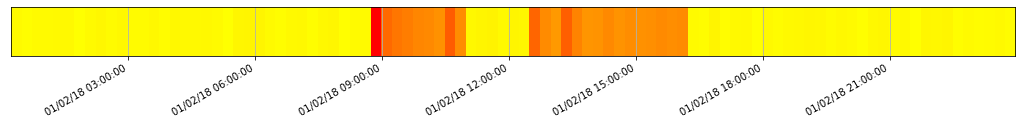

In [4]:
ta.plots.status(ts)

In [5]:
ts2 = ta.TimeSeries.create("01-2020", "02-2020", "H")
ts2 = ts2.fill(np.random.randint(0,100,len(ts2)))

In [13]:
ts3 = ta.TimeSeries.create("01-01-2020 09:00", "01-01-2020 20:00", "15min")

In [14]:
ts3 = ts3.fill(np.random.randint(0, 3, len(ts3)))

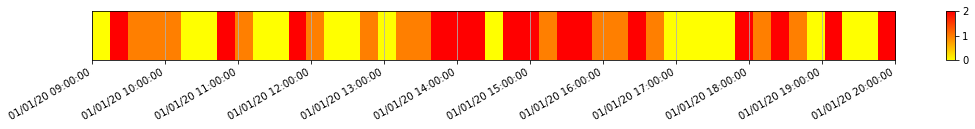

In [25]:
import matplotlib.dates as mdates 

def status(ts):
    fig, ax = plt.subplots(figsize=(18,1))
    
    # Set x limits
    x_lims = [ts.boundaries()[0].to_pydatetime(),ts.boundaries()[1].to_pydatetime()]    
    x_lims = mdates.date2num(x_lims)
    
    # Set y limits (for the sake of having something...)
    y_lims = [ts.min().values[0], ts.max().values[0]]
    
    date_format = mdates.DateFormatter('%d/%m/%y %H:%M:%S')
    ax.xaxis.set_major_formatter(date_format)
    
    ax.set_yticks([]) # remove all yticks
    
    m = ax.imshow([ts.series],
              extent = [x_lims[0], x_lims[1],  y_lims[0], y_lims[1]],
              aspect='auto', 
              cmap="autumn_r")
    
    ax.xaxis_date()
    
    fig.autofmt_xdate()
    plt.grid(b=True, which='both')
    plt.colorbar(m, aspect=5)
    

    plt.show();
    
status(ts3)

In [170]:
x_lims = [ts.boundaries()[0].to_pydatetime(),ts.boundaries()[1].to_pydatetime()]

In [171]:
x_lims

[datetime.datetime(2018, 2, 1, 0, 13, 10),
 datetime.datetime(2018, 2, 1, 23, 58, 4)]

In [169]:
    x_lims = mdates.date2num(ts.series.index)


In [158]:
import datetime as dt

x_lims = list(map(dt.datetime.fromtimestamp, [982376726, 982377321]))

In [161]:
type(x_lims[0])

datetime.datetime

datetime.datetime(2018, 2, 1, 23, 58, 4)

In [11]:
s = s.asfreq("S", method="backfill")
ts_filled = ta.TimeSeries(s)

In [24]:
ts_a = ta.TimeSeries.create("01-2020", "02-2020", "H")
ts_a = ts_a.fill(1)
ts_b = ta.TimeSeries.create("01-2020", "02-2020", "15min")
ts_b = ts_b.fill(2)

In [26]:
ts_a

                     values
2020-01-01 00:00:00       1
2020-01-01 01:00:00       1
2020-01-01 02:00:00       1
2020-01-01 03:00:00       1
2020-01-01 04:00:00       1
...                     ...
2020-01-31 20:00:00       1
2020-01-31 21:00:00       1
2020-01-31 22:00:00       1
2020-01-31 23:00:00       1
2020-02-01 00:00:00       1

[745 rows x 1 columns]

In [29]:
ts_a.append(ts_b).sort()

                     values
2020-01-01 00:00:00       1
2020-01-01 00:00:00       2
2020-01-01 00:15:00       2
2020-01-01 00:30:00       2
2020-01-01 00:45:00       2
...                     ...
2020-01-31 23:15:00       2
2020-01-31 23:30:00       2
2020-01-31 23:45:00       2
2020-02-01 00:00:00       1
2020-02-01 00:00:00       2

[3722 rows x 1 columns]

/Users/frederic.montet/.local/share/virtualenvs/timeatlas-6ip_oGBK/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:245: MatplotlibDeprecationWarning: 
The epoch2num function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  base = dates.epoch2num(dt.asi8 / 1.0e9)


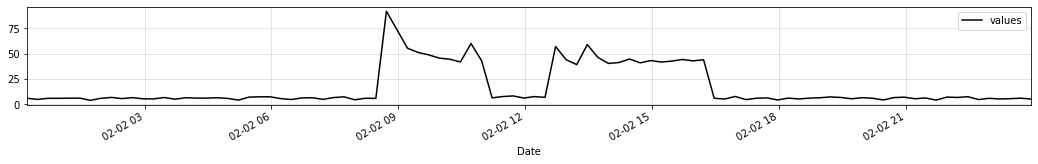

In [138]:
ts.plot()

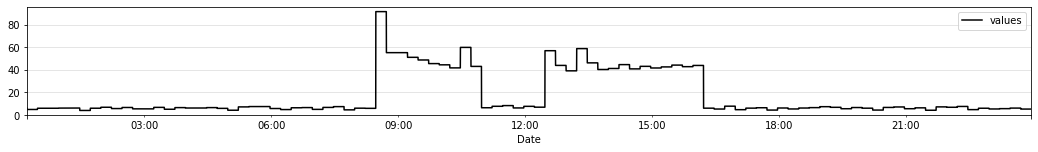

In [139]:
ts_filled.plot()

In [140]:
ts.describe()

,values
count,95.000000
mean,16.754200
std,19.096193
min,4.095000
25%,5.959500
50%,6.620000
75%,23.790001
max,91.604996


In [141]:
ts.min()

values    4.095
dtype: float64

In [142]:
ts.max()

values    91.604996
dtype: float64

In [143]:
ts.boundaries()

(Timestamp('2018-02-01 00:13:10'), Timestamp('2018-02-01 23:58:04'))

In [144]:
ts.duration()

Timedelta('0 days 23:44:54')

In [15]:
ts = ta.TimeSeries.create("01-2019", "01-2020")

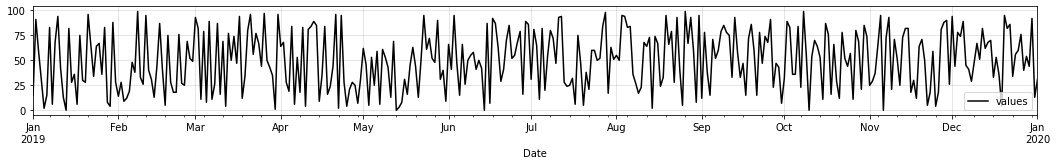

In [19]:
ts ts.fill(np.random.randint(0,100, len(ts))).plot()

In [12]:
ts.resolution()

                      values
2020-01-01 00:00:00      NaT
2020-01-01 01:00:00 01:00:00
2020-01-01 02:00:00 01:00:00
2020-01-01 03:00:00 01:00:00
2020-01-01 04:00:00 01:00:00
...                      ...
2020-01-31 20:00:00 01:00:00
2020-01-31 21:00:00 01:00:00
2020-01-31 22:00:00 01:00:00
2020-01-31 23:00:00 01:00:00
2020-02-01 00:00:00 01:00:00

[745 rows x 1 columns]

/Users/frederic.montet/.local/share/virtualenvs/timeatlas-6ip_oGBK/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:245: MatplotlibDeprecationWarning: 
The epoch2num function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  base = dates.epoch2num(dt.asi8 / 1.0e9)


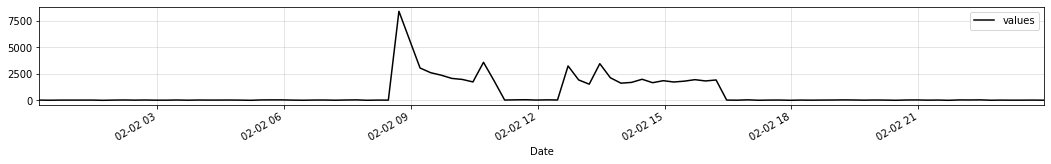

In [147]:
ts.apply(lambda x : x**2).plot()

/Users/frederic.montet/.local/share/virtualenvs/timeatlas-6ip_oGBK/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:245: MatplotlibDeprecationWarning: 
The epoch2num function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  base = dates.epoch2num(dt.asi8 / 1.0e9)


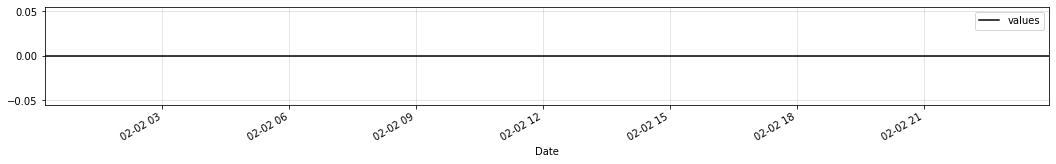

In [149]:
ts.apply(lambda x,y: x-y, ts).plot()

In [1]:
ts = ta.TimeSeries.create("01-2020", "02-2020", "H")
ts = ts.fill(np.random.randint(0,1000,len(ts)))
ts

NameError: name 'ta' is not defined

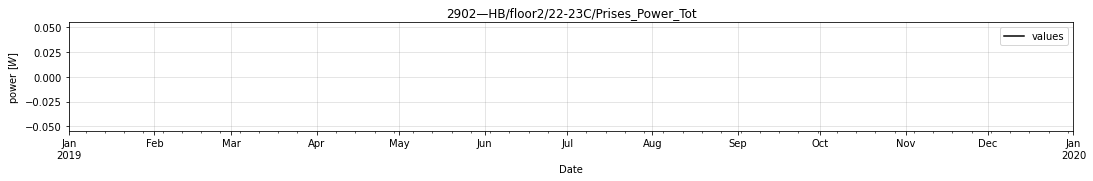

In [30]:
ts.plot()

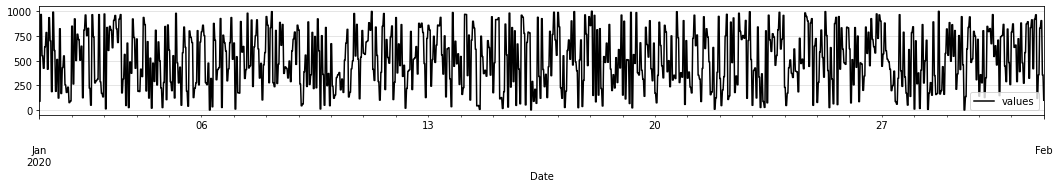

In [11]:
ts.resample("30min", method="pad").plot()

In [13]:
ts = ta.TimeSeries.create("01-2020", "02-2020", "H")
ts = ts.fill(np.random.randint(0,1000,len(ts)))
ts.series[:10] = None
ts.series[-10:] = None

In [14]:
first_idx = ts.series.first_valid_index()
last_idx = ts.series.last_valid_index()
ts.series = ts.series.loc[first_idx:last_idx]

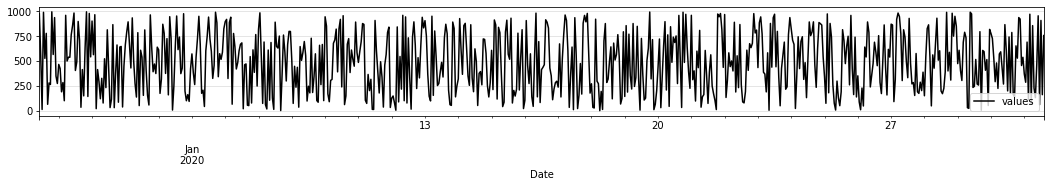

In [15]:
ts.plot()

In [16]:
ts.trim("start")

                     values
2020-01-01 10:00:00   978.0
2020-01-01 11:00:00   558.0
2020-01-01 12:00:00    12.0
2020-01-01 13:00:00   991.0
2020-01-01 14:00:00   527.0
...                     ...
2020-01-31 10:00:00   956.0
2020-01-31 11:00:00    60.0
2020-01-31 12:00:00   909.0
2020-01-31 13:00:00   161.0
2020-01-31 14:00:00   757.0

[725 rows x 1 columns]

In [17]:
ts.trim()

                     values
2020-01-01 10:00:00   978.0
2020-01-01 11:00:00   558.0
2020-01-01 12:00:00    12.0
2020-01-01 13:00:00   991.0
2020-01-01 14:00:00   527.0
...                     ...
2020-01-31 10:00:00   956.0
2020-01-31 11:00:00    60.0
2020-01-31 12:00:00   909.0
2020-01-31 13:00:00   161.0
2020-01-31 14:00:00   757.0

[725 rows x 1 columns]

In [18]:
test = ts.to_darts()
test

                         0
2020-01-01 10:00:00  978.0
2020-01-01 11:00:00  558.0
2020-01-01 12:00:00   12.0
2020-01-01 13:00:00  991.0
2020-01-01 14:00:00  527.0
...                    ...
2020-01-31 10:00:00  956.0
2020-01-31 11:00:00   60.0
2020-01-31 12:00:00  909.0
2020-01-31 13:00:00  161.0
2020-01-31 14:00:00  757.0

[725 rows x 1 columns]
Freq: H

In [25]:
ts.series.resample('6H')

## Define a Metadata object

In [6]:
from timeatlas import Metadata, types

# You can use some typed metadata object
my_unit = types.Unit("power", "W", "float")
my_sensor = types.Sensor(2902, "HB/floor2/22-23C/Prises_Power_Tot")

# Or use Python dictionaries
my_location = {
    "building" : "Blue Factory",
    "floor" : "12",
    "room"  : "22C"
}
my_coordinates = {
    "lat" : 46.796611,
    "lon" : 7.147563
}
my_dict = {
    "unit": my_unit,
    "sensor": my_sensor,
    "location": my_location,
    "coordinates": my_coordinates
}

# Create the Metadata object
my_meta = Metadata(my_dict)


## Define a TimeSeries with Metadata

In [7]:
ts = ts.fill(np.random.randint(0,100,len(ts)))

In [8]:
#ts_meta = ta.TimeSeries(ts, my_meta)
ts.metadata = my_meta

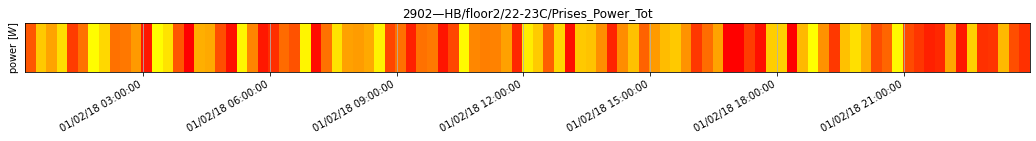

In [10]:
ta.plots.status(ts)

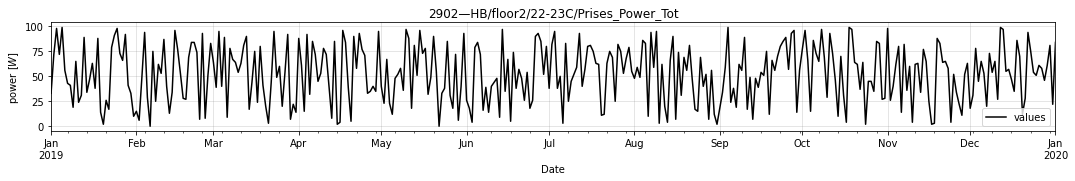

In [45]:
ts.plot()

<AxesSubplot:>

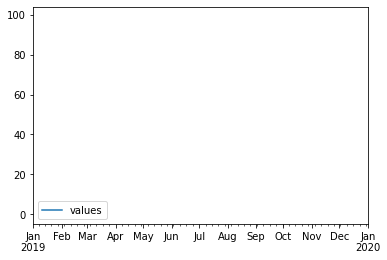

In [44]:
ts.resample("1H").series.plot()

<AxesSubplot:>

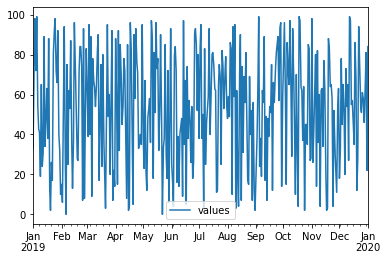

In [46]:
ts.resample("1H").series.interpolate().plot()

## Make Predictions

Some definitions:

- `time series` : self-explanatory, i.e. the TimeSeries object
- `horizon` : the duration to predict after the last value of the time series
- `frequency`: the number of values per unit of time. Usually, the frequency is given in Pandas offset aliases (https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases)

```
                                horizon
   |-------------------------|- - - - - -|
                             |||||||||||||
           time series         frequency

```

In [ ]:
from timeatlas import models

In [ ]:
m1 = models.Prophet()
m1.fit(ts_meta)
pts1 = m1.predict(ts_meta)
pts2 = m1.predict("24 hours")

In [ ]:
m2 = models.LinearRegression()
m2.fit(ts_meta)
pts3 = m2.predict(ts_meta)
pts4 = m2.predict("14 days")

In [ ]:
from timeatlas import plots

plots.prediction(ts_meta, pts1)

## Detect Anomalies


In [ ]:
from timeatlas import detectors, metrics

In [ ]:
ts.apply(lambda x: x+1).series.head()

In [ ]:
# Create the base of the detector. 
# i.e. this detector is based on this model and compute this error
d = detectors.Surprise(m1, metrics.relative_error)

# Set the alerts
d.alerts("quantile", [0.65, 0.8, 0.85, 0.95])\

# Fit the detector with a specific Time Series
d.fit(ts_meta)

In [ ]:
# Detect anomalies with the fitted detector
a = d.detect(ts2)

In [ ]:
a.plot()

In [ ]:
d.truth.plot()
d.prediction.plot()

## Scalers

In [ ]:
from timeatlas.processors import scalers

In [ ]:
ts_meta.plot()

In [ ]:
y = scalers.minmax(ts_meta)

In [ ]:
y.plot()